In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5885818827999990000
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14185677223516102223
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
X = df.drop('label', axis=1)  # Pixel values
y = df['label']  # Labels (digit classes)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# visualize data from train data

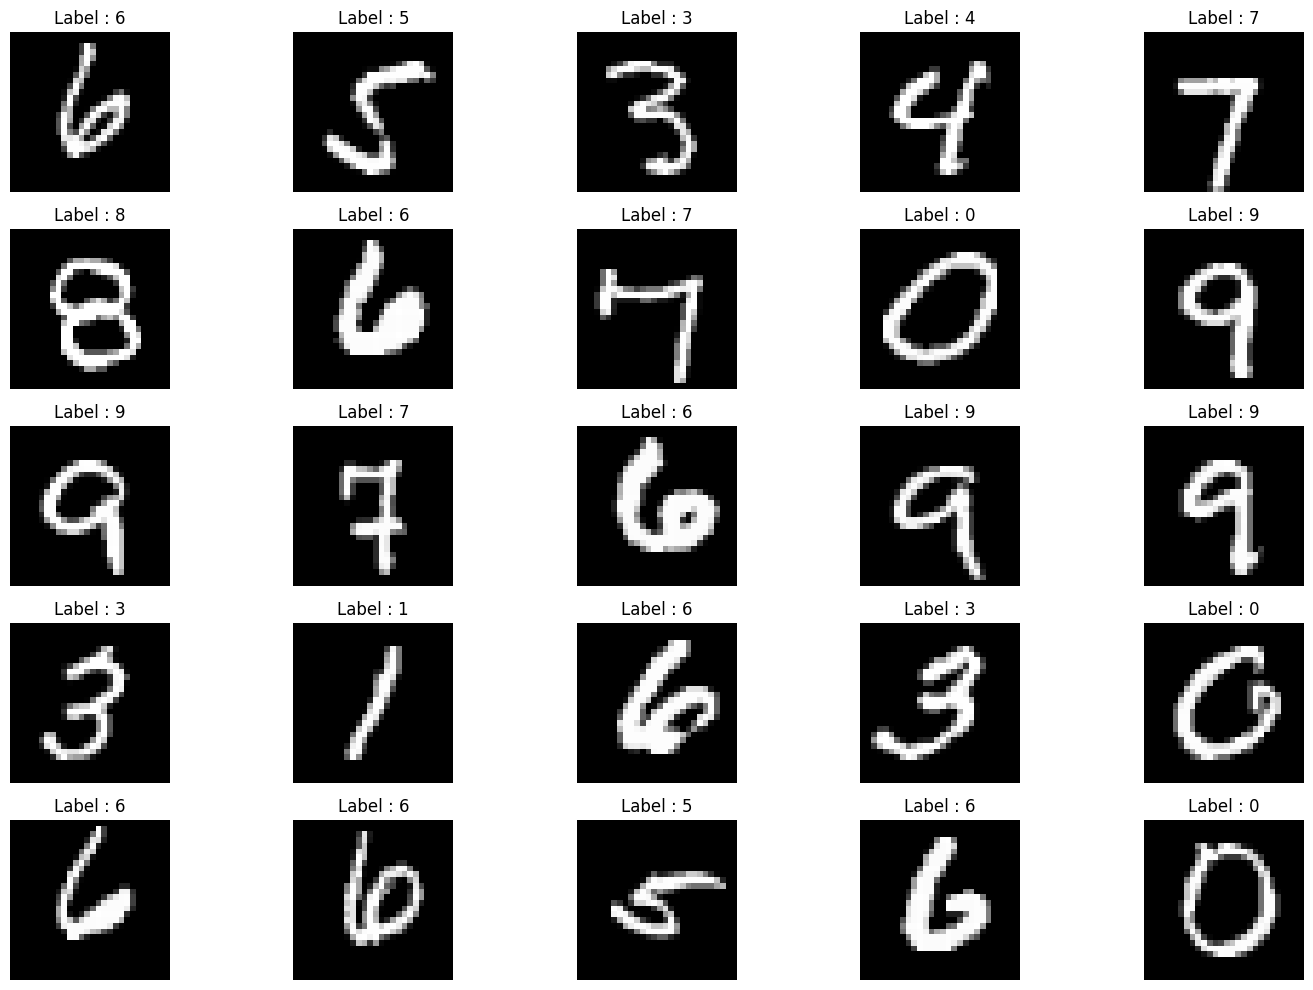

In [10]:
fig,ax=plt.subplots(5,5,figsize=(15,10))
ax=ax.flatten()
for i in range(25):
    image=X_train.iloc[i].values.reshape(28,28)
    label=y_train.iloc[i]
    ax[i].imshow(image,cmap="gray")
    ax[i].set_title(f"Label : {label}")
    ax[i].axis("off")
plt.tight_layout()
plt.show() 

# visualize data from test data

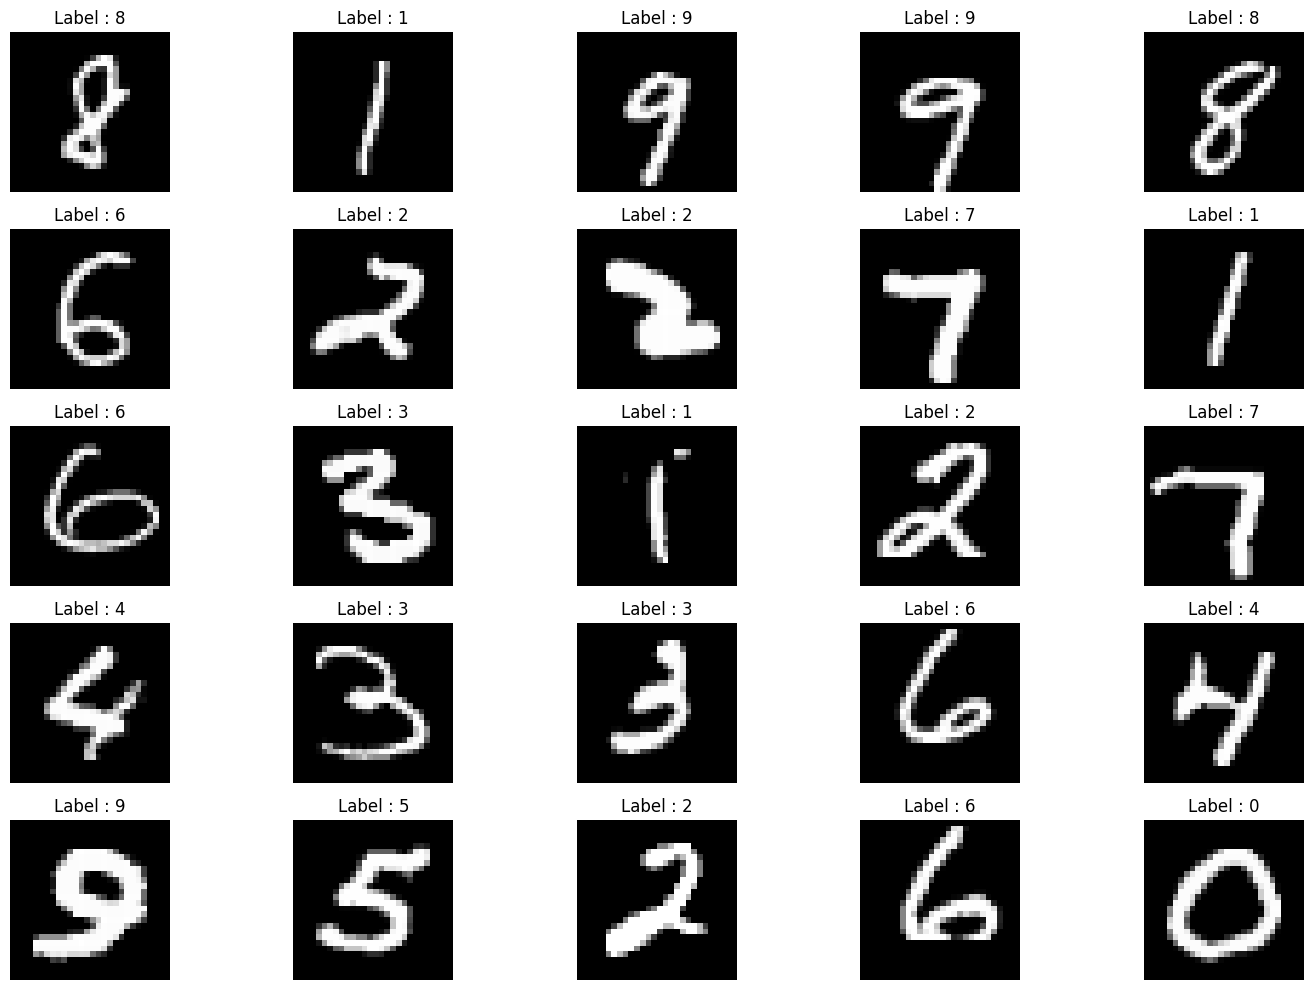

In [11]:
fig,ax=plt.subplots(5,5,figsize=(15,10))
ax=ax.flatten()
for i in range(25):
    image=X_valid.iloc[i].values.reshape(28,28)
    label=y_valid.iloc[i]
    ax[i].imshow(image,cmap="gray")
    ax[i].set_title(f"Label : {label}")
    ax[i].axis("off")
plt.tight_layout()
plt.show() 

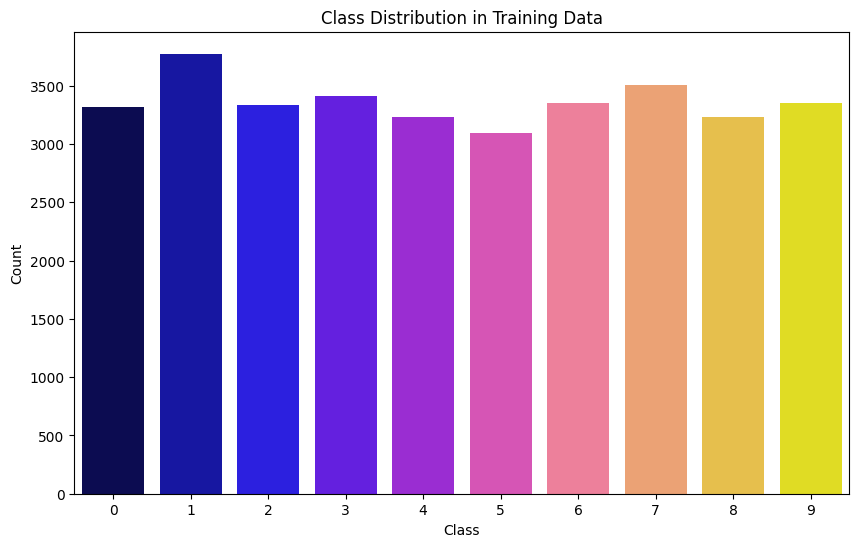

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train,palette="gnuplot2")  # Count the occurrences of each class
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

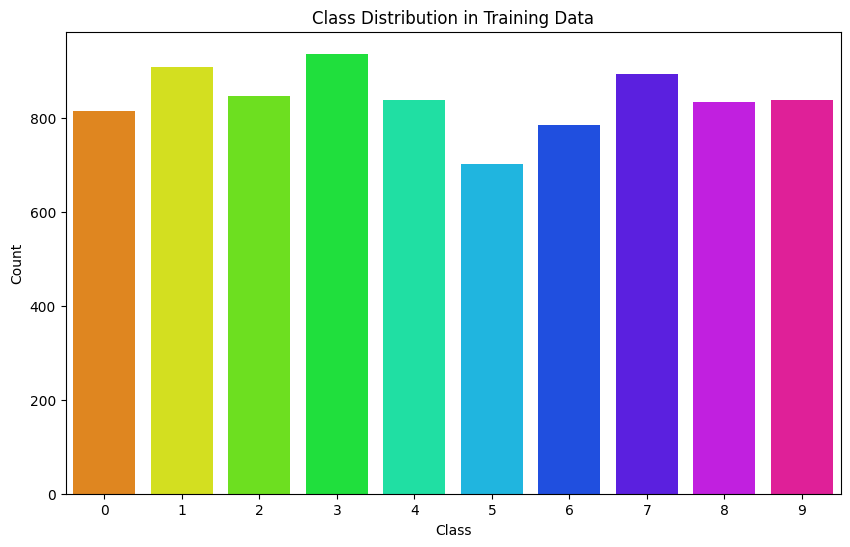

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_valid,palette="hsv")  # Count the occurrences of each class
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:

X_train_gray = X_train.values.reshape(-1, 28, 28, 1)
X_test_gray = X_valid.values.reshape(-1, 28, 28, 1)

X_train_gray = X_train_gray.astype('float32') / 255.0
X_test_gray = X_test_gray.astype('float32') / 255.0

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_valid, num_classes=10)

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,994 (7.55 MB)

 Trainable params: 1,977,994 (7.55 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train_gray, y_train_onehot, epochs=30, batch_size=64, 
                    validation_data=(X_test_gray, y_test_onehot))

Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6751 - loss: 0.8961 - val_accuracy: 0.9783 - val_loss: 0.0742
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9785 - loss: 0.0830 - val_accuracy: 0.9836 - val_loss: 0.0616
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9875 - loss: 0.0516 - val_accuracy: 0.9911 - val_loss: 0.0397
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9885 - loss: 0.0457 - val_accuracy: 0.9880 - val_loss: 0.0447
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9922 - loss: 0.0315 - val_accuracy: 0.9871 - val_loss: 0.0565
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9928 - loss: 0.0290 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.9900 - val_loss: 0.0474
Epoch 8/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9955 - loss: 0.0204 - val_accuracy: 0

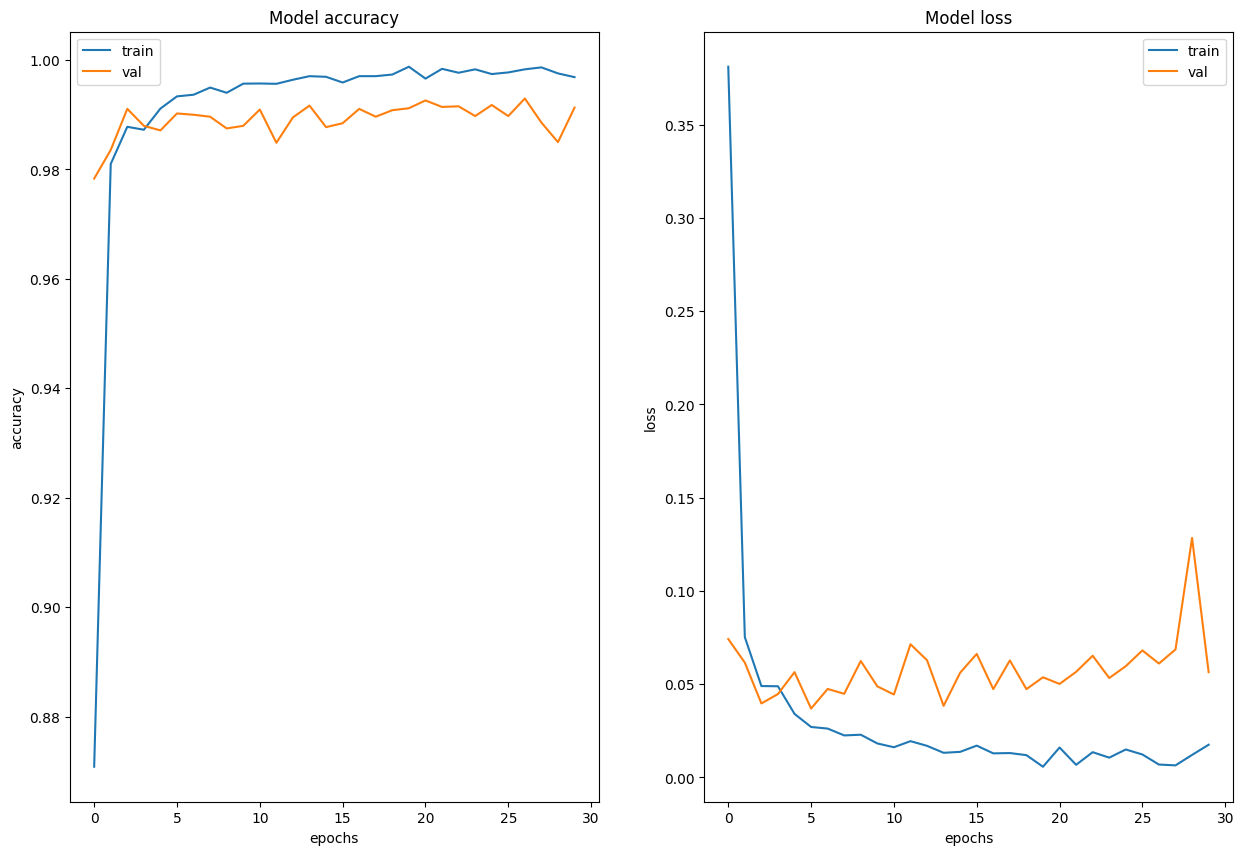

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])
plt.show()

In [18]:

test_loss, test_acc = model.evaluate(X_test_gray, y_test_onehot)
print(f"Test accuracy: {test_acc}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0804
Test accuracy: 0.9913095235824585


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


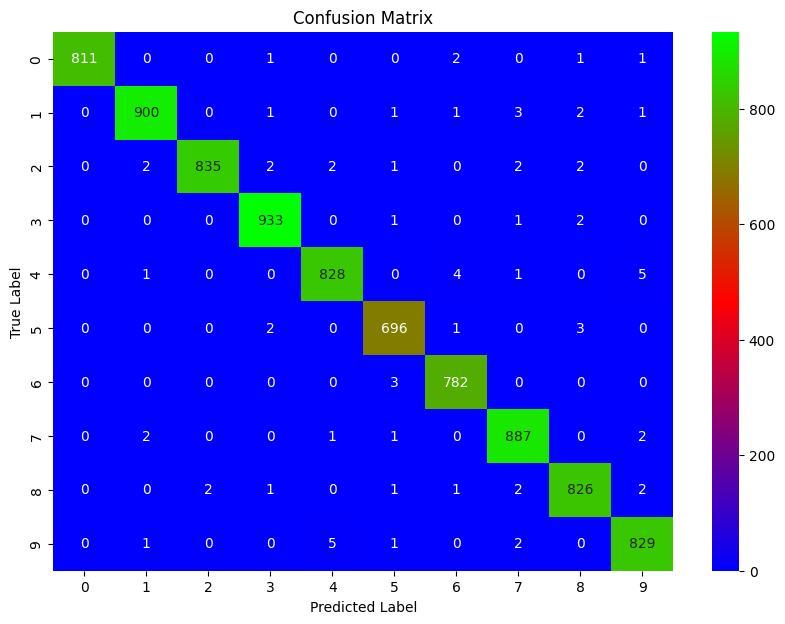

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       816
           1       0.99      0.99      0.99       909
           2       1.00      0.99      0.99       846
           3       0.99      1.00      0.99       937
           4       0.99      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      1.00      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.99      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [19]:

from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test_gray)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='brg', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(np.argmax(y_test_onehot, axis=1), y_pred_classes))


In [20]:
test_df=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [21]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_pixels = test_df.values
X_test_ready = test_pixels.reshape(-1, 28, 28, 1)
X_test_ready = X_test_ready.astype('float32') / 255.0
predictions = model.predict(X_test_ready)
predicted_classes = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
test=pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
test.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [24]:
ImageId=test.ImageId

In [25]:
submission=pd.DataFrame({"ImageId":ImageId,"Label":predicted_classes})
submission.to_csv("submission.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
